<a href="https://colab.research.google.com/github/Fadhal1/ejaztech.ai-project/blob/main/CAR_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

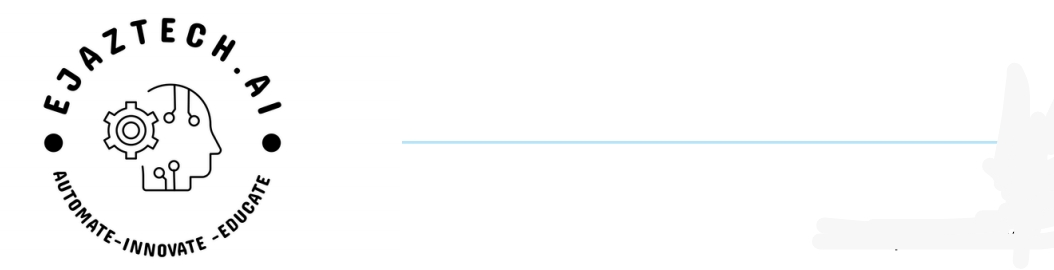

# EJAZTECH.AI FROM ZERO TO HERO PHASE 4 PROJECT SUBMISSION BY SANI FIDDALA MUHAMMAD
PROJECT NO.2

In [ ]:
# Installation
!pip install pandas==2.1.4
!pip install scikit-learn==1.6.0

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Handle missing values
df=df.dropna()
X=df.drop(columns=['price'])
y=df['price']
X=pd.get_dummies(X)


In [3]:
#checking null value
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [18]:
#dropping car id since it not useful
df=df.drop(columns=['car_ID'])

In [19]:
#one-hot encoding for categorical data
encoder=LabelEncoder()
df['CarName']=encoder.fit_transform(df['CarName'])
encoder=LabelEncoder()
df['fueltype']=encoder.fit_transform(df['fueltype'])
encoder=LabelEncoder()
df['aspiration']=encoder.fit_transform(df['aspiration'])
encoder=LabelEncoder()
df['doornumber']=encoder.fit_transform(df['doornumber'])
encoder=LabelEncoder()
df['carbody']=encoder.fit_transform(df['carbody'])
encoder=LabelEncoder()
df['drivewheel']=encoder.fit_transform(df['drivewheel'])
encoder=LabelEncoder()
df['enginelocation']=encoder.fit_transform(df['enginelocation'])
encoder=LabelEncoder()
df['enginetype']=encoder.fit_transform(df['enginetype'])
encoder=LabelEncoder()
df['cylindernumber']=encoder.fit_transform(df['cylindernumber'])
encoder=LabelEncoder()
df['fuelsystem']=encoder.fit_transform(df['fuelsystem'])

In [20]:
#display after one-hot encoding for categorical data
display(df)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,1,0,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,138,1,1,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,140,1,0,0,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,142,0,1,0,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


## Model Training

In [22]:
# Split data into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
X

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,False,False,False,False,False,False,False,True,False,False
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,False,False,False,False,False,True,False,False,False,False


In [25]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print(X_train.shape)
print(y_train.shape)

(164, 200)
(164,)


In [28]:
X_train

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
66,67,0,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,...,False,False,False,False,False,True,False,False,False,False
111,112,0,107.9,186.7,68.4,56.7,3075,120,3.46,2.19,...,False,False,False,False,False,False,False,True,False,False
153,154,0,95.7,169.7,63.6,59.1,2280,92,3.05,3.03,...,False,False,False,True,False,False,False,False,False,False
96,97,1,94.5,165.3,63.8,54.5,1971,97,3.15,3.29,...,False,False,False,True,False,False,False,False,False,False
38,39,0,96.5,167.5,65.2,53.3,2289,110,3.15,3.58,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,...,False,False,False,False,False,False,False,True,False,False
14,15,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,...,False,False,False,False,False,False,False,True,False,False
92,93,1,94.5,165.3,63.8,54.5,1938,97,3.15,3.29,...,False,False,False,True,False,False,False,False,False,False
179,180,3,102.9,183.5,67.7,52.0,3016,171,3.27,3.35,...,False,False,False,False,False,False,False,True,False,False


In [29]:
y_train

,price
66,18344.0
111,15580.0
153,6918.0
96,7499.0
38,9095.0
...,...
106,18399.0
14,24565.0
92,6849.0
179,15998.0


In [30]:
print(X_test.shape)
print(y_test.shape)

(41, 200)
(41,)


In [31]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [32]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
xgb=XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
neural_network_model = Sequential([Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
Dense(32,activation='relu'),
Dense(16,activation='relu'),
Dense(1)])
neural_network_model.compile(optimizer='adam', loss='mean_squared_error')
neural_network_model.fit(X_train,y_train,epochs=100,verbose=0)
y_pred = neural_network_model.predict(X_test).flatten()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [36]:
# Define evaluation metrics
metrics = {
    "Mean Absolute Error": mean_absolute_error,
    "Mean Squared Error": mean_squared_error,
    "R-squared": r2_score
}

# Generate predictions for each model
linear_predictions = linear_model.predict(X_test)
tree_predictions = tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
xgb_predictions = xgb.predict(X_test)
neural_network_predictions = neural_network_model.predict(X_test).flatten()

results = {}
for name, func in metrics.items():
    # Calculate scores for each model
    linear_score = func(y_test, linear_predictions)
    tree_score = func(y_test, tree_predictions)
    random_forest_score = func(y_test, random_forest_predictions)
    xgb_score = func(y_test, xgb_predictions)
    neural_network_score = func(y_test, neural_network_predictions)

    # Store results in the dictionary
    results[name] = {
        "Linear Regression": linear_score,
        "Decision Tree": tree_score,
        "Random Forest": random_forest_score,
        "XGBoost": xgb_score,
        "Neural Network": neural_network_score
    }

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [37]:
display(results)

{'Mean Absolute Error': {'Linear Regression': 7036.822888069458,
  'Decision Tree': 2027.9187073170733,
  'Random Forest': 1362.603731707317,
  'XGBoost': 1730.5049540777438,
  'Neural Network': 2763.747873999619},
 'Mean Squared Error': {'Linear Regression': 178507387.43101543,
  'Decision Tree': 9228180.459802171,
  'Random Forest': 3597063.4966994873,
  'XGBoost': 6169270.536108117,
  'Neural Network': 18893164.241520666},
 'R-squared': {'Linear Regression': -1.261189453513297,
  'Decision Tree': 0.8831047575614419,
  'Random Forest': 0.95443526366382,
  'XGBoost': 0.9218525929213492,
  'Neural Network': 0.7606764384307024}}

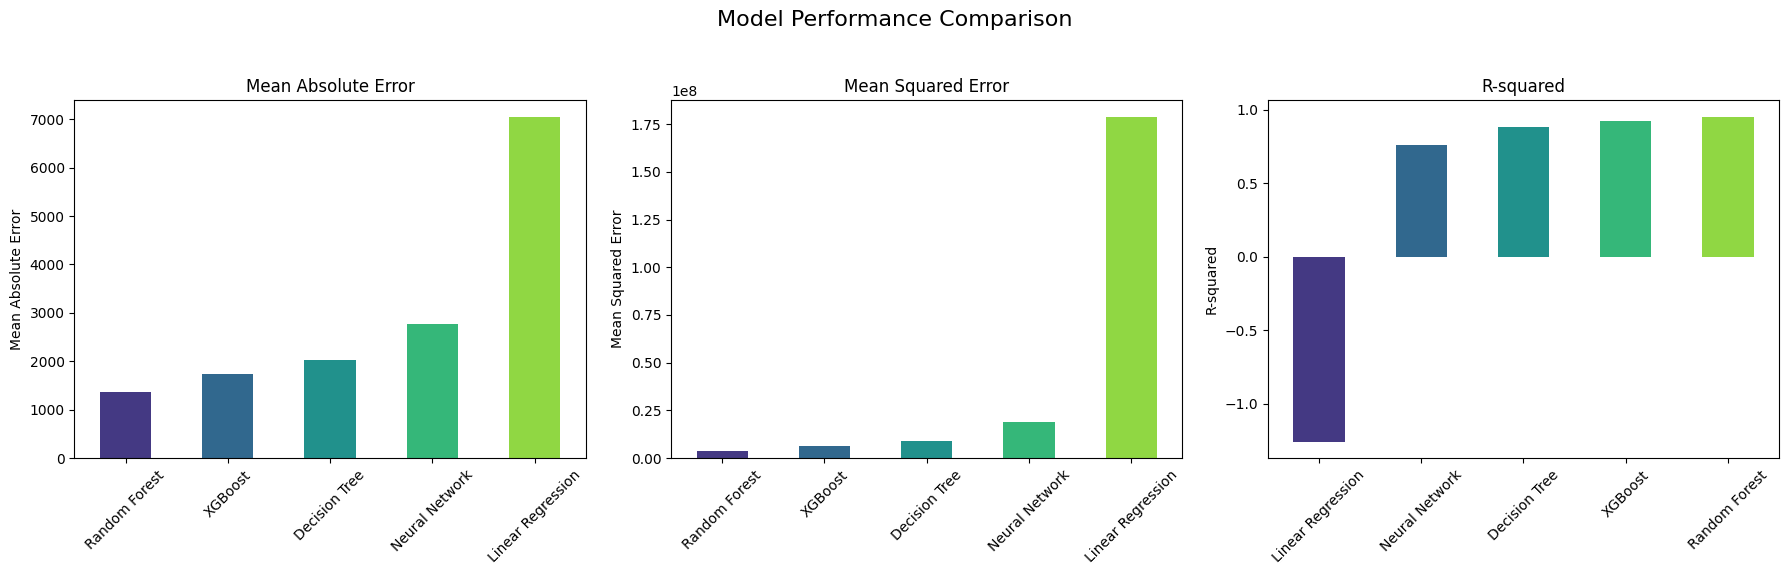

In [39]:


# Converting the results to a pandas DataFrame
results_df = pd.DataFrame(results)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=len(results_df.columns), figsize=(18, 6))
fig.suptitle('Model Performance Comparison', fontsize=16)

for i, metric in enumerate(results_df.columns):
    ax = axes[i]
    results_df[metric].sort_values().plot(kind='bar', ax=ax, color=sns.color_palette('viridis', len(results_df)))
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

## Model Performance Interpretation

Based on the evaluation metrics:

* **Mean Absolute Error (MAE):** Lower values indicate better performance.
* **Mean Squared Error (MSE):** Lower values indicate better performance.
* **R-squared:** Higher values indicate better performance.

Looking at the results:

* **Random Forest** has the lowest MAE and MSE, and the highest R-squared, suggesting it is the best-performing model among those trained.
* **XGBoost** also performs well, with metrics close to Random Forest.
* **Decision Tree** performs reasonably well but not as good as Random Forest or XGBoost.
* **Neural Network** performs better than Linear Regression but not as well as the tree-based models.
* **Linear Regression** has the highest MAE and MSE, and the lowest R-squared (a negative R-squared indicates a poor fit), making it the least suitable model in this case.

Therefore, the **Random Forest** model appears to be the most suitable model for predicting car prices based on these results.